# Machine Learning Exam 09/01/23
## Napolitano Daniele
---
### 1. Load the data file and explore the data, showing size, data descriptions,data distributions with boxplot, pairplots . . . 

In [33]:
#import libraries and modules
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix

#set random state
random_state=42


In [34]:
#load names from file
names=[]
with open('ML-Python-Lab-Data-Names.txt') as f:
    for line in f:
        names.append(line.strip())
#load data
df = pd.read_csv('ML-Python-Lab-Data.csv', names=names)

#print size
print("shape: ", df.shape)
#make Sex column a onehot encoding
df = pd.get_dummies(df, columns=['Sex'])


target="Rings"

#show description
df.describe()



shape:  (4177, 10)


,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623,0.312904,0.321283,0.365813
std,1205.940366,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510,0.463731,0.467025,0.481715
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,0.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000,0.000000,0.000000,0.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000,0.000000,0.000000,0.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000,1.000000,1.000000,1.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000,1.000000,1.000000,1.000000


In [35]:
df.head()

,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0,0,0,1
1,1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0,0,0,1
2,2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0,1,0,0
3,3,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0,0,0,1
4,4,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0,0,1,0


<AxesSubplot: >

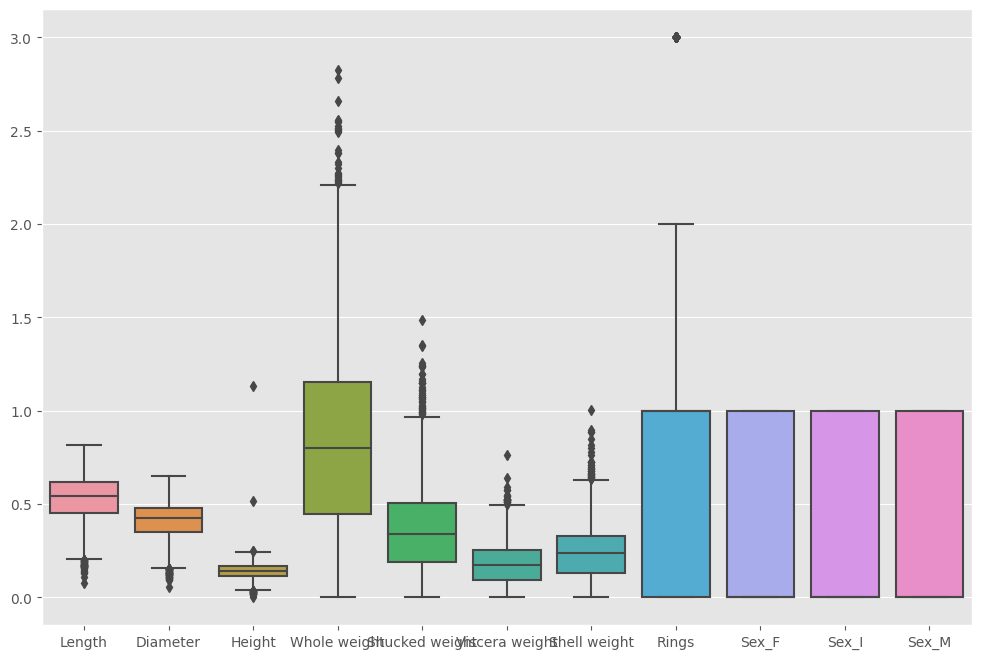

In [36]:
#boxplot with seaborn
plt.figure(figsize=(12,8))
#boxplot all columns except first
sns.boxplot(data=df.iloc[:,1:])

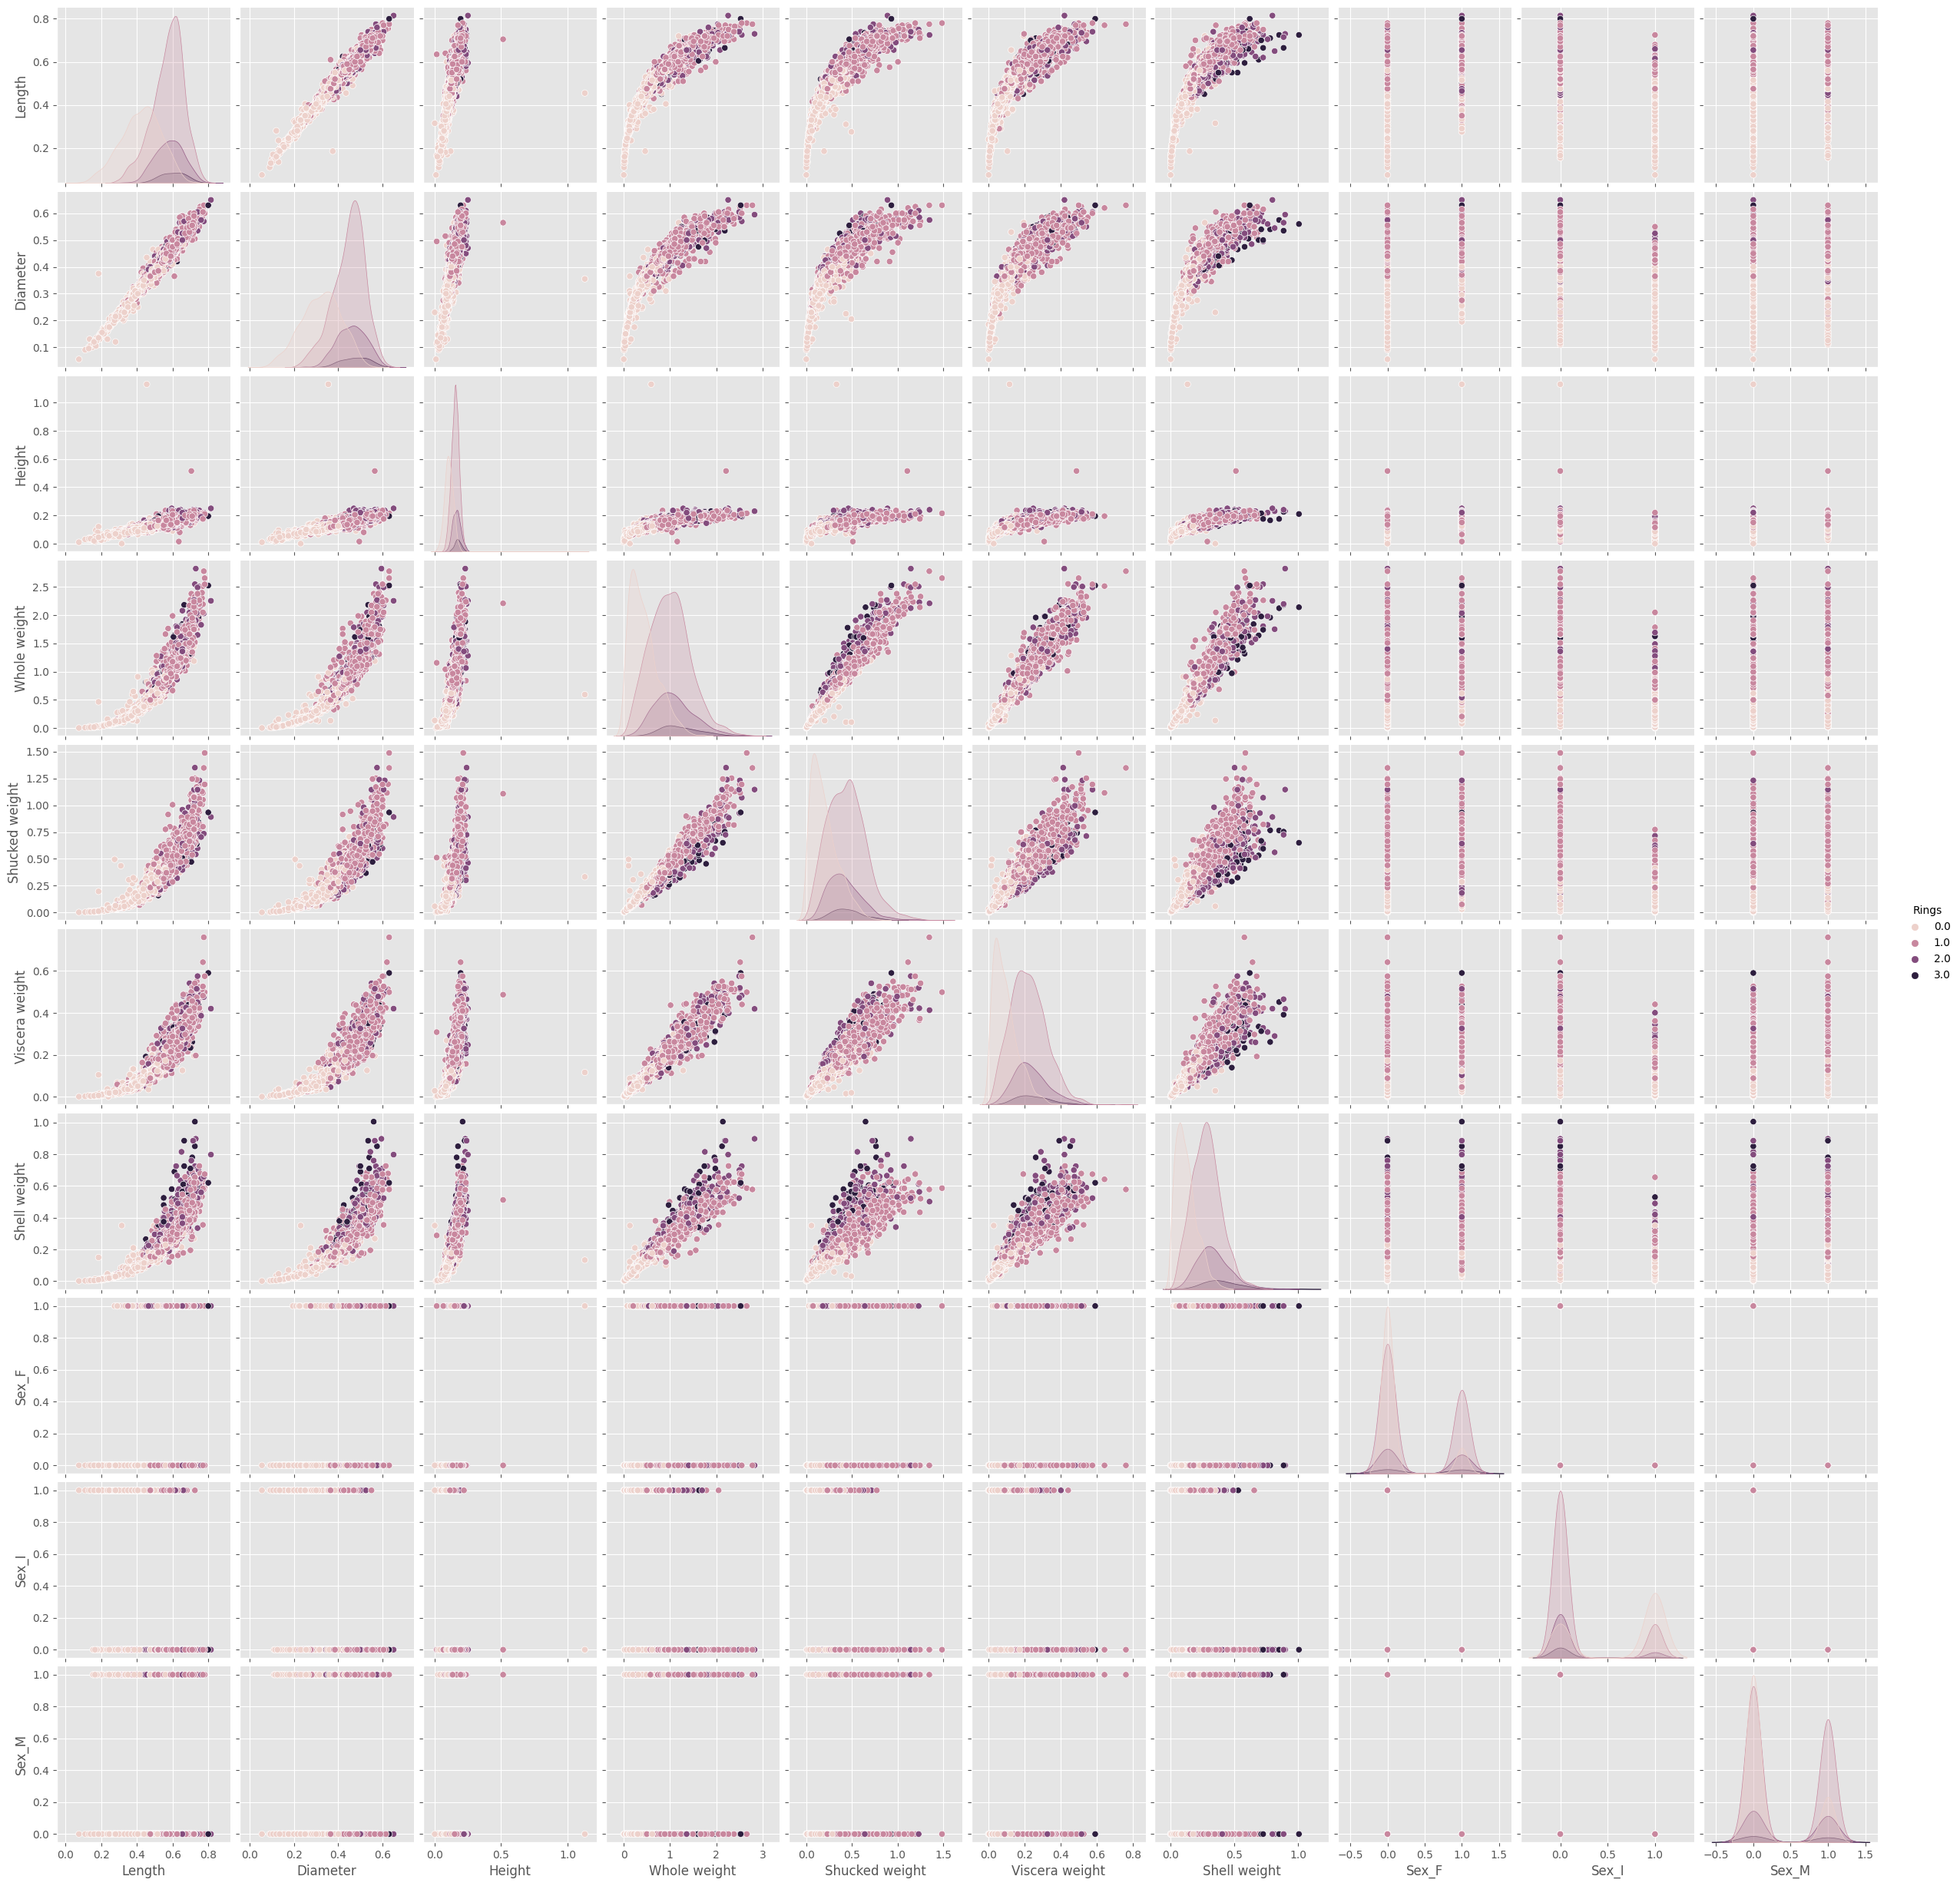

In [37]:
#pairplot with hue sex
sns.pairplot(df.iloc[:,1:], hue=target)

---
### 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values 

- As we can see from the histogram above, the data is slightly imbalanced. There are more Male samples than Females and Infants, but not so much.<br>
- From the description table and the boxplot, we can infer that "Height" has many outliers, and also in the pairplot it's clear that it's distribution is skewed. <br>
- There are missing values, since the counts are not the same for all the features. <br>

---
### 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any 

Dropping missing values (can be Nan values or 0 values for feature "Height")

In [38]:
#drop rows with height=0
df = df[df['Height']!=0]
#drop rows with nan values
df = df.dropna()

Dropping the Index column (not relevant for the classification, since its purpose is to identify the samples, and does not tell anything about the samples themselves)


In [39]:
#drop index column
df = df.drop(columns=['Index'])

In [40]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,0.528781,0.412242,0.141395,0.848687,0.365207,0.184572,0.245732,0.937725,0.314323,0.307768,0.377909
std,0.118404,0.098015,0.042823,0.491015,0.220690,0.109349,0.140545,0.785142,0.464322,0.461646,0.484944
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,0.000000
25%,0.460000,0.355000,0.115000,0.467250,0.195500,0.099000,0.137750,0.000000,0.000000,0.000000,0.000000
50%,0.550000,0.425000,0.145000,0.817500,0.342000,0.174000,0.240000,1.000000,0.000000,0.000000,0.000000
75%,0.620000,0.485000,0.170000,1.176250,0.506750,0.257000,0.335000,1.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.641500,0.897000,3.000000,1.000000,1.000000,1.000000


In [41]:
# treat outliers by scaling the data
from sklearn.preprocessing import MinMaxScaler


In [42]:
#remove outliers for height
#df=df[df['Height']<0.5]

In [43]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,0.528781,0.412242,0.141395,0.848687,0.365207,0.184572,0.245732,0.937725,0.314323,0.307768,0.377909
std,0.118404,0.098015,0.042823,0.491015,0.220690,0.109349,0.140545,0.785142,0.464322,0.461646,0.484944
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000,0.000000
25%,0.460000,0.355000,0.115000,0.467250,0.195500,0.099000,0.137750,0.000000,0.000000,0.000000,0.000000
50%,0.550000,0.425000,0.145000,0.817500,0.342000,0.174000,0.240000,1.000000,0.000000,0.000000,0.000000
75%,0.620000,0.485000,0.170000,1.176250,0.506750,0.257000,0.335000,1.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.641500,0.897000,3.000000,1.000000,1.000000,1.000000


---
### 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure


To find the best classification scheme, I used the GridSearchCV function, which performs a cross validation on the training set, and finds the best hyperparameters for different models. <br>

The models I used are: <br>
- Decision Tree
- Gaussian Naive Bayes
- Linear Perceptron
- Support Vector
- K Nearest Neighbor
- AdaBoost
- Random forest



In [44]:
from sklearn.preprocessing import RobustScaler
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target]), df[target], test_size=0.2, random_state=random_state)
#fit minmaxscaler to X_train, except for sex columns and apply to X_train and X_test with transform method
scaler = RobustScaler()
X_train.iloc[:,:-2] = scaler.fit_transform(X_train.iloc[:,:-2])
X_test.iloc[:,:-2] = scaler.transform(X_test.iloc[:,:-2])

In [45]:
model_lbls = [
              'dt', 
              'nb', 
              'lp', 
              'svc', 
             'knn',
             'adb',
             'rf',
            ]

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': [*range(1,20)]}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
tuned_param_lp = [{'early_stopping': [True]}]
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000],                     
                    },
                   ]
tuned_param_knn =[{'n_neighbors': list(range(1, 10))}]
tuned_param_adb = [{'n_estimators':[20,30,40,50],
                   'learning_rate':[0.5,0.75,1,1.25,1.5]}]
tuned_param_rf = [{'max_depth': [*range(7,15)],
                   'n_estimators':[*range(10,100,10)]}]
#define the models, with the parameter grids listed above
models = {
'dt': {'name': 'Decision Tree       ',
       'estimator': DecisionTreeClassifier(), 
       'param': tuned_param_dt,
       },
'nb': {'name': 'Gaussian Naive Bayes',
       'estimator': GaussianNB(),
       'param': tuned_param_nb
       },
'lp': {'name': 'Linear Perceptron   ',
       'estimator': Perceptron(),
       'param': tuned_param_lp,
       },
'svc':{'name': 'Support Vector      ',
       'estimator': SVC(), 
       'param': tuned_param_svc
       },
'knn':{'name': 'K Nearest Neighbor ',
       'estimator': KNeighborsClassifier(),
       'param': tuned_param_knn
       },
'adb':{'name': 'AdaBoost           ',
       'estimator': AdaBoostClassifier(),
       'param': tuned_param_adb
       },
'rf': {'name': 'Random forest       ',
       'estimator': RandomForestClassifier(),
       'param': tuned_param_rf
       }
}



results_short = {}

In [46]:
import warnings
warnings.filterwarnings('ignore')

scores = ['f1_macro']
models_params=[]

for score in scores:
    print('='*40)
    print("# Tuning hyper-parameters for %s #" % score)
    print()
    for m in model_lbls:
        print('-'*40)
        print("Training model {}".format(models[m]['name']))
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                           scoring=score, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )

        clf.fit(X_train, y_train)
        y_clf=clf.predict(X_test)
        conf_mat=confusion_matrix(y_test,y_clf)
        #print_results(clf)
        results_short[m] = [clf.best_score_,conf_mat, clf.best_params_]
        print("best score:",clf.best_score_)

# Tuning hyper-parameters for f1_macro #

----------------------------------------
Training model Decision Tree       


best score: 0.4885921976123532
----------------------------------------
Training model Gaussian Naive Bayes
best score: 0.41746644882193634
----------------------------------------
Training model Linear Perceptron   
best score: 0.3613031074645839
----------------------------------------
Training model Support Vector      
best score: 0.46965784249731113
----------------------------------------
Training model K Nearest Neighbor 
best score: 0.4494437680662237
----------------------------------------
Training model AdaBoost           
best score: 0.48879190946309475
----------------------------------------
Training model Random forest       
best score: 0.4930713103836615


---
### 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model


In [47]:
for m in results_short.keys():
    print("{}\t - score: {:4.2}% - params:{}".format(models[m]['name'], results_short[m][0], results_short[m][2]))
    print("Confusion matrix:")
    print(results_short[m][1])

Decision Tree       	 - score: 0.49% - params:{'max_depth': 9}
Confusion matrix:
[[127  61   5   0]
 [ 44 188  35   3]
 [  3  75  41   6]
 [  0  12  10   1]]
Gaussian Naive Bayes	 - score: 0.42% - params:{'var_smoothing': 0.1}
Confusion matrix:
[[159  33   1   0]
 [ 64 167  25  14]
 [ 17  72  21  15]
 [  0  14   3   6]]
Linear Perceptron   	 - score: 0.36% - params:{'early_stopping': True}
Confusion matrix:
[[131  44  18   0]
 [ 48 205  15   2]
 [ 16  91   8  10]
 [  0  18   1   4]]
Support Vector      	 - score: 0.47% - params:{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion matrix:
[[137  55   1   0]
 [ 34 223  13   0]
 [  6  80  39   0]
 [  0  10  13   0]]
K Nearest Neighbor 	 - score: 0.45% - params:{'n_neighbors': 1}
Confusion matrix:
[[133  50  10   0]
 [ 54 173  42   1]
 [ 11  55  53   6]
 [  1   4  15   3]]
AdaBoost           	 - score: 0.49% - params:{'learning_rate': 1, 'n_estimators': 50}
Confusion matrix:
[[162  30   0   1]
 [ 62 190  14   4]
 [ 11  72  31  11]
 [  0 

In [48]:
from sklearn.metrics import accuracy_score
# get the best model with the highest score
best_model = max(results_short, key=results_short.get)
print("Best model is {} with score {:4.2}%".format(models[best_model]['name'], results_short[best_model][0]))
print("Confusion matrix:")
print(results_short[best_model][1])
#get accuracy
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy:" ,accuracy)

Best model is Random forest        with score 0.49%
Confusion matrix:
[[147  43   3   0]
 [ 39 209  22   0]
 [  8  63  53   1]
 [  0   9  14   0]]
Accuracy: 0.6693944353518821
